In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("cereal.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [12]:
df['sugars'].head(15)

0      6
1      8
2      5
3      0
4      8
5     10
6     14
7      8
8      6
9      5
10    12
11     1
12     9
13     7
14    13
Name: sugars, dtype: int64

<Axes: >

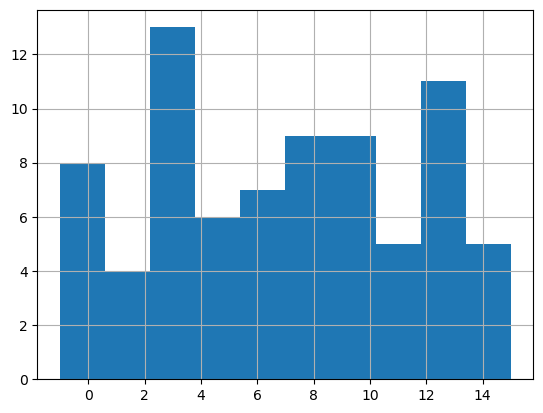

In [4]:
df['sugars'].hist()

<Axes: >

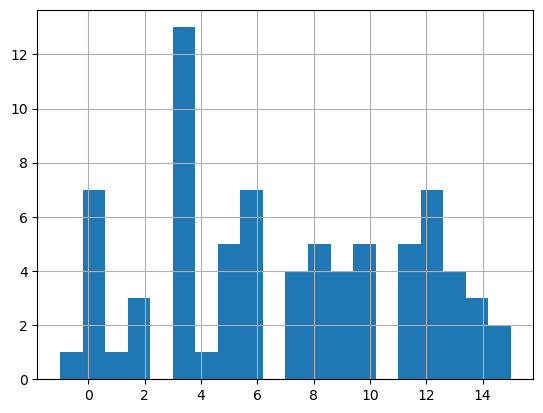

In [9]:
df['sugars'].hist(bins =20)

<Axes: >

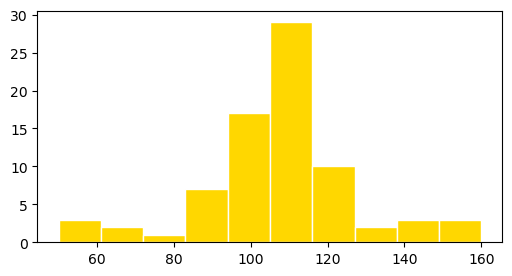

In [28]:
plt.figure(figsize=(6,3))
df['calories'].hist(bins =10,
                 color = 'gold'
                   ,edgecolor = 'white',
                   grid = False) 

In [21]:
df['calories'].max()

160

<Axes: ylabel='Frequency'>

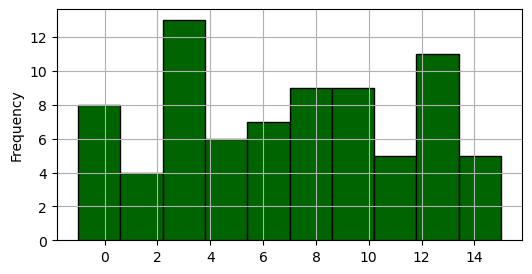

In [34]:
plt.figure(figsize=(6,3))
df['sugars'].plot(kind = 'hist',
                  color = 'darkgreen',
                 grid = True,
                 edgecolor = 'black')


In [35]:
df['sugars'].mean()

6.922077922077922

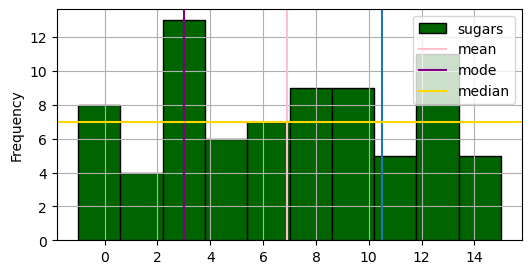

In [53]:
plt.figure(figsize=(6,3))
df['sugars'].plot(kind = 'hist',
                  color = 'darkgreen',
                 grid = True,
                 edgecolor = 'black')
plt.axvline(df['sugars'].mean(), color = 'pink').set_label('mean')
plt.axvline(10.5)# סתם מספר 
plt.axvline(df['sugars'].mode()[0], color = 'purple').set_label('mode')
plt.axhline(df['sugars'].median(), color = 'gold').set_label('median') #אין לזה משמעות מתמטית ככה אבל זה כל כך יפה
plt.legend()

<Axes: ylabel='Frequency'>

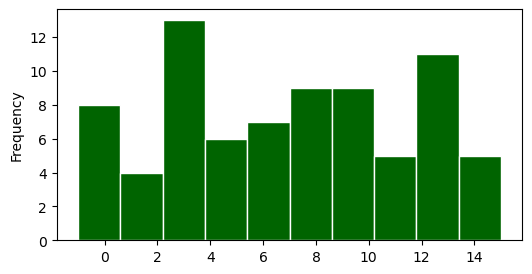

In [52]:
plt.figure(figsize=(6,3))
df['sugars'].plot(kind = 'hist',
                  color = 'darkgreen',
                 
                 edgecolor = 'white')

#### bar plot

In [57]:
df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [59]:
mfr = df.groupby('mfr')

In [81]:
mfr_rating = mfr['rating'].mean()
mfr_cl = mfr['calories'].mean()
mfr_rating

mfr
A    54.850917
G    34.485852
K    44.038462
N    67.968567
P    41.705744
Q    42.915990
R    41.542997
Name: rating, dtype: float64

<BarContainer object of 7 artists>

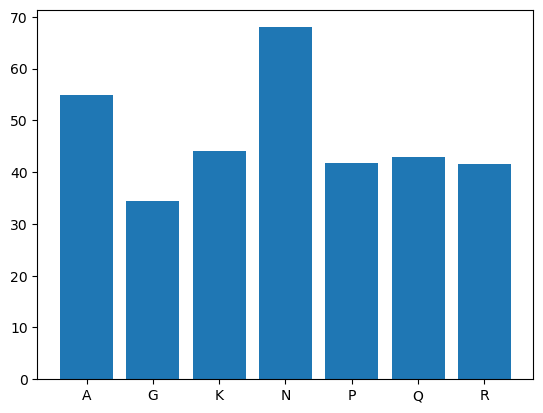

In [66]:
plt.bar(mfr_rating.index,mfr_rating)

In [65]:
mfr_rating.index

Index(['A', 'G', 'K', 'N', 'P', 'Q', 'R'], dtype='object', name='mfr')

<Axes: xlabel='mfr'>

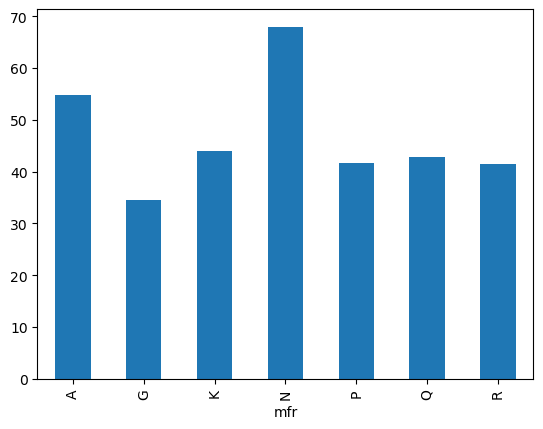

In [68]:
mfr_rating.plot(kind= 'bar')

<BarContainer object of 7 artists>

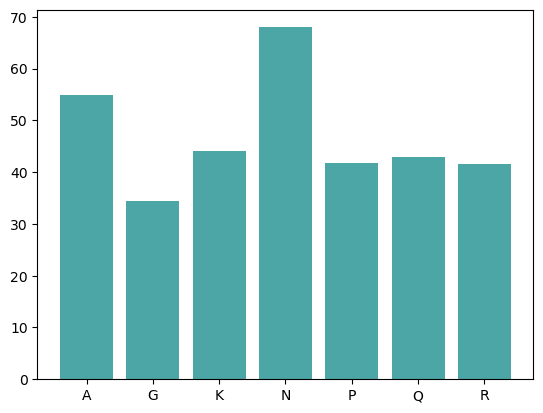

In [70]:
plt.bar(mfr_rating.index,mfr_rating, 
        color = 'teal',
       alpha = 0.7)

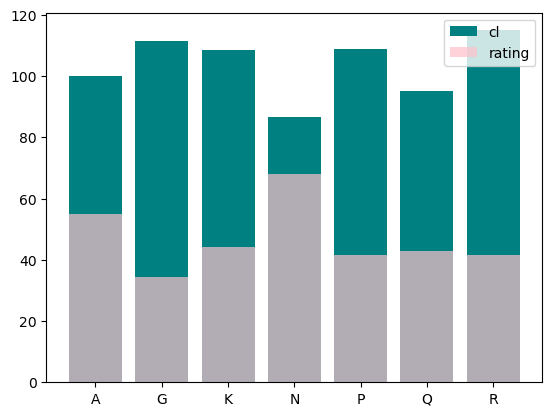

In [77]:
plt.bar(mfr_cl.index,mfr_cl, 
        color = 'teal',label = 'cl'
       )
plt.bar(mfr_rating.index,mfr_rating, 
        color = 'pink',
       alpha = 0.7, label = 'rating')
plt.legend()

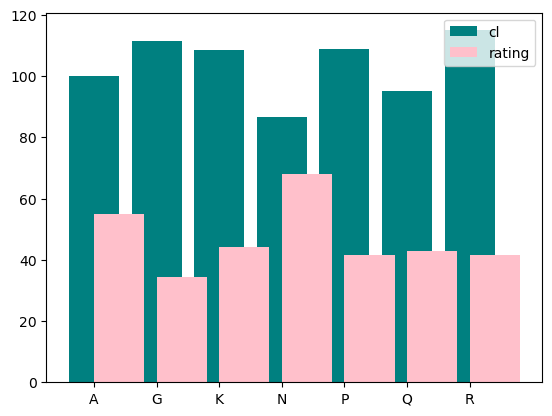

In [88]:
colors = ['red','orange','yellow','green','blue','purple','pink']
plt.bar(mfr_cl.index,mfr_cl, 
        color = 'teal',label = 'cl'
       )
plt.bar(mfr_rating.index,mfr_rating, 
        color = 'pink'
       , label = 'rating', align= 'edge')
plt.legend()

pie

In [110]:
pct = (mfr.size()/len(df))*100
pct

mfr
A     1.298701
G    28.571429
K    29.870130
N     7.792208
P    11.688312
Q    10.389610
R    10.389610
dtype: float64

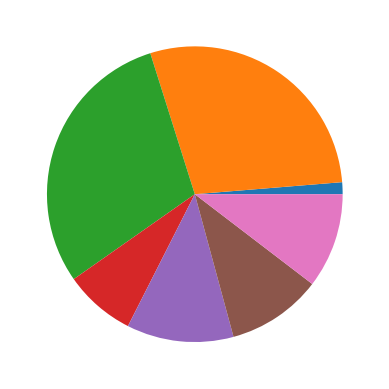

In [98]:
plt.pie(pct)
plt.show()

<Axes: >

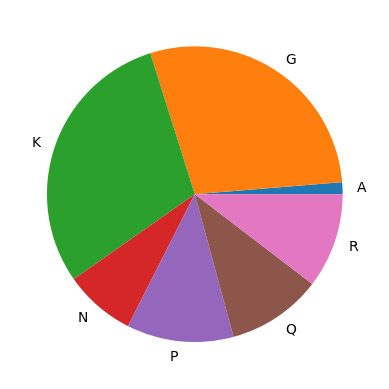

In [97]:
pct.plot(kind = 'pie')

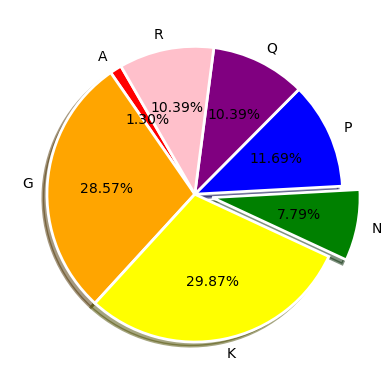

In [121]:
colors = ['red','orange','yellow','green','blue','purple','pink']
plt.pie(mfr.size(),
        labels =pct.index,
       wedgeprops = {'edgecolor':'white',
                    'linewidth':2},
       startangle= 120,
       explode = [0,0,0,0.12,0,0,0],
       shadow = True,
       autopct = '%1.2f%%',
       colors =colors)
plt.show()

mfr
A     1
G    22
K    23
N     6
P     9
Q     8
R     8
dtype: int64